# IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as graph
import random
import tensorflow as tf
import os

import keras
from keras.models import Sequential
from keras.layers import Dense


from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.train import Optimizer

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from keras.utils.tf_utils import RaggedTensorValue
from tensorflow.compat.v1.ragged import RaggedTensorValue

#from tensorflow.compat.v1.ragged import RaggedTensorValue


print("Group Libraries imported")

Group Libraries imported


In [3]:
# Defining the  paths to the dataset
train_dir = "D:\\Bone Fracture Final Project\\train"
validation_dir = "D:\\Bone Fracture Final Project\\valid"
test_dir = "D:\\Bone Fracture Final Project\\test"

In [4]:
# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

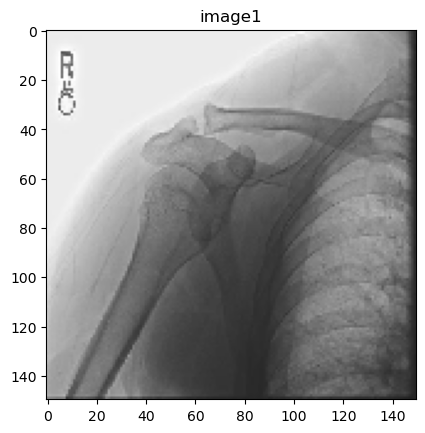

In [6]:
#Loading a sample image
from tensorflow.keras.preprocessing.image import load_img

# Function to extract label from image path
def extract_label(image_path):
    parts = image_path.split("\\")
    filename = parts[-1]
    label = filename.split("_")[0]  # Assuming label is before the first underscore
    return label

# Load the image
image_path = "D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg"
image = load_img(image_path, target_size=(150, 150))  # Load image and resize if necessary

# Extract label from the image path
label = extract_label(image_path)

# Display the image and label
graph.imshow(image)
graph.title(label)
graph.show()


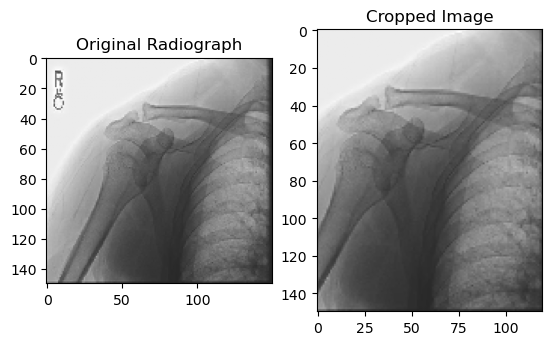

In [7]:
# Define the random_crop function
def random_crop(input_image):
    return tf.image.random_crop(input_image, size=[150, 120, 3])

# Assuming 'image' is a PIL Image object
image_np = np.array(image)  # Convert PIL Image to NumPy array
image_np = image_np / 255.0  # Perform division by float

# Convert the image_np to a TensorFlow tensor
image_tf = tf.convert_to_tensor(image_np, dtype=tf.float32)

# Crop the image
cropped_image_tf = random_crop(image_tf)

# Convert the cropped image back to a NumPy array
cropped_image_np = cropped_image_tf.numpy()

# Plot the original and cropped images
fig, ax = graph.subplots(1, 2)
ax[0].imshow(image_np)
ax[0].set_title("Original Radiograph")

ax[1].imshow(cropped_image_np)
ax[1].set_title("Cropped Image")

graph.show()

# Rotating the image

In [39]:
def random_rotation(input_image):
    #angles = np.random.randint(0, 4, 1)
    #return tf.image.rot90(input_image, k=angles[0])
    rotate_angle = random.uniform(-30, 30)
    rotated_image = tf.image.rot90(randomly_cropped_image, k=random.randint(0, 3))


In [41]:
# CENTRAL CROPPING
def central_crop(input_image):
    image = tf.image.resize(input_image, [204, 204])
    return tf.image.central_crop(image, central_fraction=0.40)

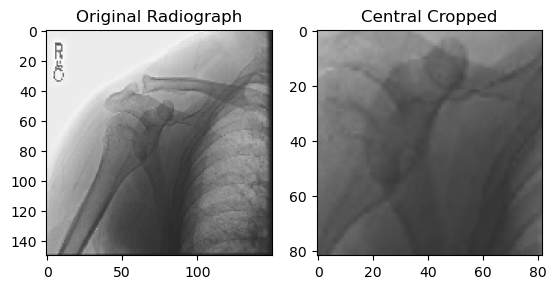

In [42]:
# Convert the original image to a NumPy array and normalize
image_np = np.array(image) / 255.0

# Convert the image_np to a TensorFlow tensor
image_tf = tf.convert_to_tensor(image_np, dtype=tf.float32)

# Crop the image
cropped_image_tf = central_crop(image_tf)

# Convert the cropped image back to a NumPy array
cropped_image_np = cropped_image_tf.numpy()

# Viewing the results
fig, ax = graph.subplots(1, 2)
ax[0].imshow(image_np)  # Display the original image
ax[0].set_title("Original Radiograph")

ax[1].imshow(cropped_image_np)  # Display the cropped image
ax[1].set_title("Central Cropped")

graph.show()

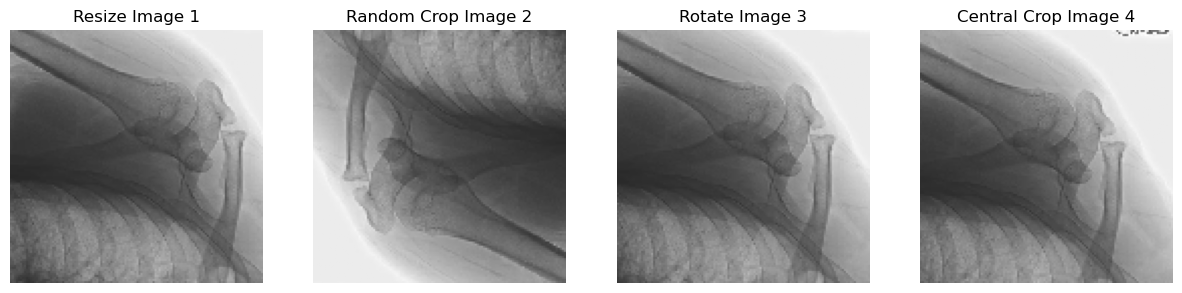

In [43]:
# Define a function to apply random transformations to an image
def apply_random_transform(image):
    transform_names = ['Resize', 'Random Crop', 'Rotate', 'Central Crop']
    
    # Randomly resize the image
    resize_factor = random.uniform(0.8, 1.2)
    resized_image = tf.image.resize(image, size=(150, 150))
    
    # Randomly crop the image
    crop_size = random.randint(120, 150)
    randomly_cropped_image = tf.image.random_crop(resized_image, size=[crop_size, crop_size, 3])
    
    # Randomly rotate the image
    rotate_angle = random.uniform(-30, 30)
    rotated_image = tf.image.rot90(randomly_cropped_image, k=random.randint(0, 3))
    
    # Randomly central crop the image
    central_fraction = random.uniform(0.8, 1.0)
    central_cropped_image = tf.image.central_crop(rotated_image, central_fraction=central_fraction)
    
    return central_cropped_image, transform_names

# Load a sample image
image_path = "D:\\Bone Fracture Final Project\\train\\images\\image1_23_png.rf.3e419917bce843d0f0a55aeff031df20.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Convert image to array and normalize

# Apply random transformations and display each transformed image
graph.figure(figsize=(15, 5))
for i in range(4):  
    transformed_image, transform_names = apply_random_transform(image)
    graph.subplot(1, 4, i + 1)
    graph.title(f"{transform_names[i]} Image {i+1}")
    graph.imshow(transformed_image)
    graph.axis("off")

graph.show()


In [44]:
#data generators with data augmentation for training and validation
# Create data generator for both training and validation with data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Shuffle the data
    #subset='training',  # Specify that this is for training data
    seed=42  # Set seed for reproducibility
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,  # Shuffle the data
    #subset='validation',  # Specify that this is for validation data
    seed=42  # Set seed for reproducibility
)

Found 3631 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


# Concatenating images and labels for validation data

In [45]:

validation_data = []
validation_labels = []
for _ in range(len(validation_generator)):
    images, labels = validation_generator.next()
    validation_data.append(images)
    validation_labels.append(labels)

validation_data = np.concatenate(validation_data)
validation_labels = np.concatenate(validation_labels)

In [46]:
# Concatenate images and labels for training data
train_data = []
train_labels = []
for _ in range(len(train_generator)):
    images, labels = train_generator.next()
    train_data.append(images)
    train_labels.append(labels)

train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)


In [47]:
# Convert the DirectoryIterator objects to TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_width, img_height, 3], [None])
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_width, img_height, 3], [None])
)


In [48]:
# Create separate data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True  # Shuffle the training data
)

# Load and preprocess the validation dataset
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Do not shuffle the validation data
)

# Convert the DirectoryIterator objects to TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_width, img_height, 3], [None])
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, img_width, img_height, 3], [None])
)

# Concatenate the datasets
concatenated_dataset = train_dataset.concatenate(validation_dataset)

# Shuffle the concatenated dataset
concatenated_dataset = concatenated_dataset.shuffle(buffer_size=batch_size * 10)  # Shuffle buffer size = batch_size * 10

# Split the concatenated dataset into batches
concatenated_dataset = concatenated_dataset.batch(batch_size)

# Optionally, prefetch the dataset for improved performance
concatenated_dataset = concatenated_dataset.prefetch(tf.data.experimental.AUTOTUNE)

Found 3631 images belonging to 2 classes.
Found 348 images belonging to 2 classes.


In [49]:
import os
import tensorflow as tf

# Define paths to your datasets
validation_dir = "D:\\Bone Fracture Final Project\\valid"
test_dir = "D:\\Bone Fracture Final Project\\test"

# Define batch size
batch_size = 20

# Function to load images and labels
def load_image_val(image_path):
    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_width, img_height])
    image = image / 255.0  # Normalize pixel values
    return image

# Create datasets for validation and test images
val_ds = tf.data.Dataset.list_files(os.path.join(validation_dir, '*', '*.jpg'), shuffle=False)
test_ds = tf.data.Dataset.list_files(os.path.join(test_dir, '*', '*.jpg'), shuffle=False)

# Map the load_image_val function to load and preprocess images
val_ds = val_ds.map(load_image_val, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.map(load_image_val, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Batch the datasets
val_ds = val_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

# Optionally, prefetch the datasets for improved performance
val_ds = val_ds.prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)


In [50]:
def visualize_sample_images(directory, num_samples):
    ...



# Example: Get a list of image filenames in the directory
image_files = os.listdir(train_dir)
num_samples = min(10, len(image_files))
visualize_sample_images(train_dir, num_samples)



In [51]:
num_samples = min(10, len(image_files))  # Visualize up to 10 samples or the total number of images, whichever is smaller
visualize_sample_images(train_dir, num_samples)


Sample images from the training dataset before data augmentation:


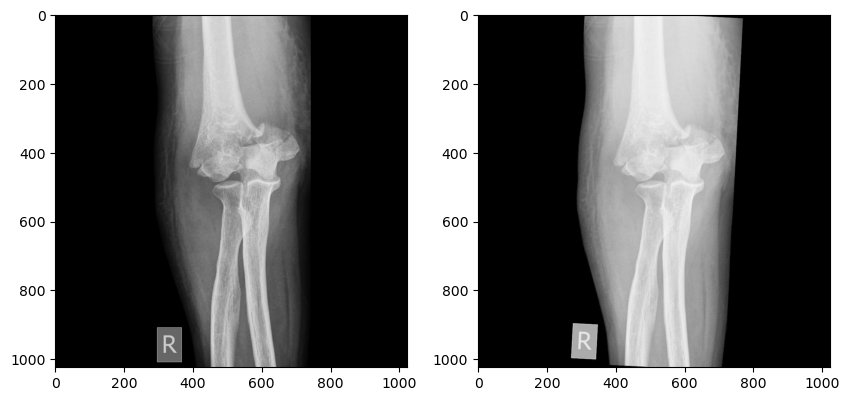

In [52]:
# Define paths to your datasets
train_dir = 'D:\\Bone Fracture Final Project\\train\\images'



# Function to visualize images
def visualize_sample_images(directory):
    # Get list of image files in the directory
    image_files = os.listdir(directory)

    # Visualize sample images
    graph.figure(figsize=(10, 10))
    for i in range(min(num_samples, len(image_files))):
        image_path = os.path.join(directory, image_files[i])
        image = graph.imread(image_path)
        graph.subplot(1, num_samples, i + 1)
        
        graph.imshow(image)
        graph.axis('on')
    graph.show()



# Visualize sample images from the training dataset
print("Sample images from the training dataset before data augmentation:")
visualize_sample_images(train_dir)


# Building the CNN model

In [62]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', 
           input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [64]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

# Training the model

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Evaluate on test set
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    
    print(f'Epoch [{epoch+1}/{epochs}], '
          f'Train Loss: {train_loss:.4f}, '
          f'Test Loss: {test_loss:.4f}, '
          f'Accuracy: {accuracy:.2f}%')

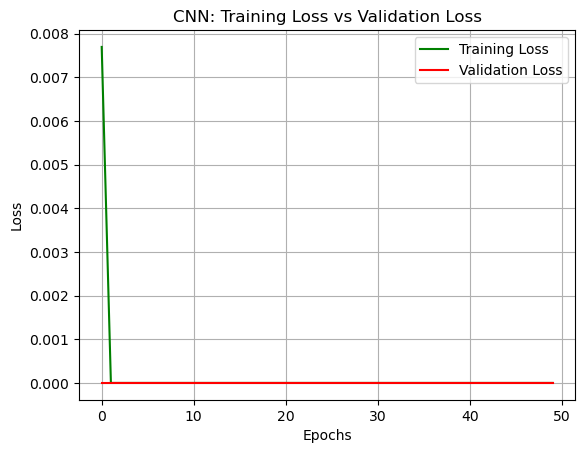

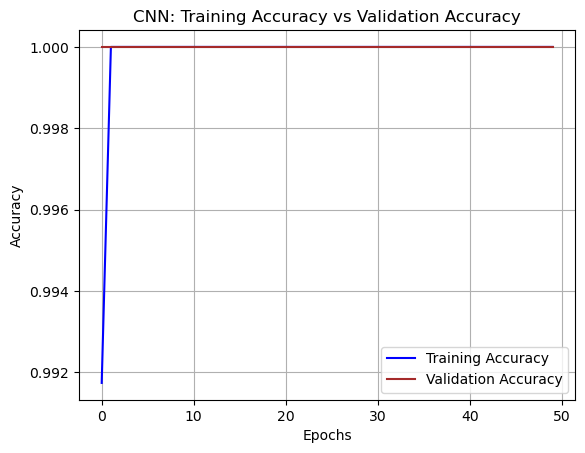

In [21]:
# Plot loss and accuracy
graph.plot(history.history['loss'], label='Training Loss', color='green')
graph.plot(history.history['val_loss'], label='Validation Loss', color='red' )
graph.xlabel('Epochs')
graph.ylabel('Loss')
graph.title("CNN: Training Loss vs Validation Loss")
graph.grid(True)
graph.legend()
graph.show()


graph.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
graph.plot(history.history['val_accuracy'], label='Validation Accuracy', color='brown')
graph.xlabel('Epochs')
graph.ylabel('Accuracy')
graph.title("CNN: Training Accuracy vs Validation Accuracy")
graph.grid(True)
graph.legend()
graph.show()


In [22]:
# Evaluating the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 169 images belonging to 2 classes.
6/6 [==============================] - 2s 334ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


# Visualizing the models predictions on test images

6/6 [==============================] - 1s 131ms/step


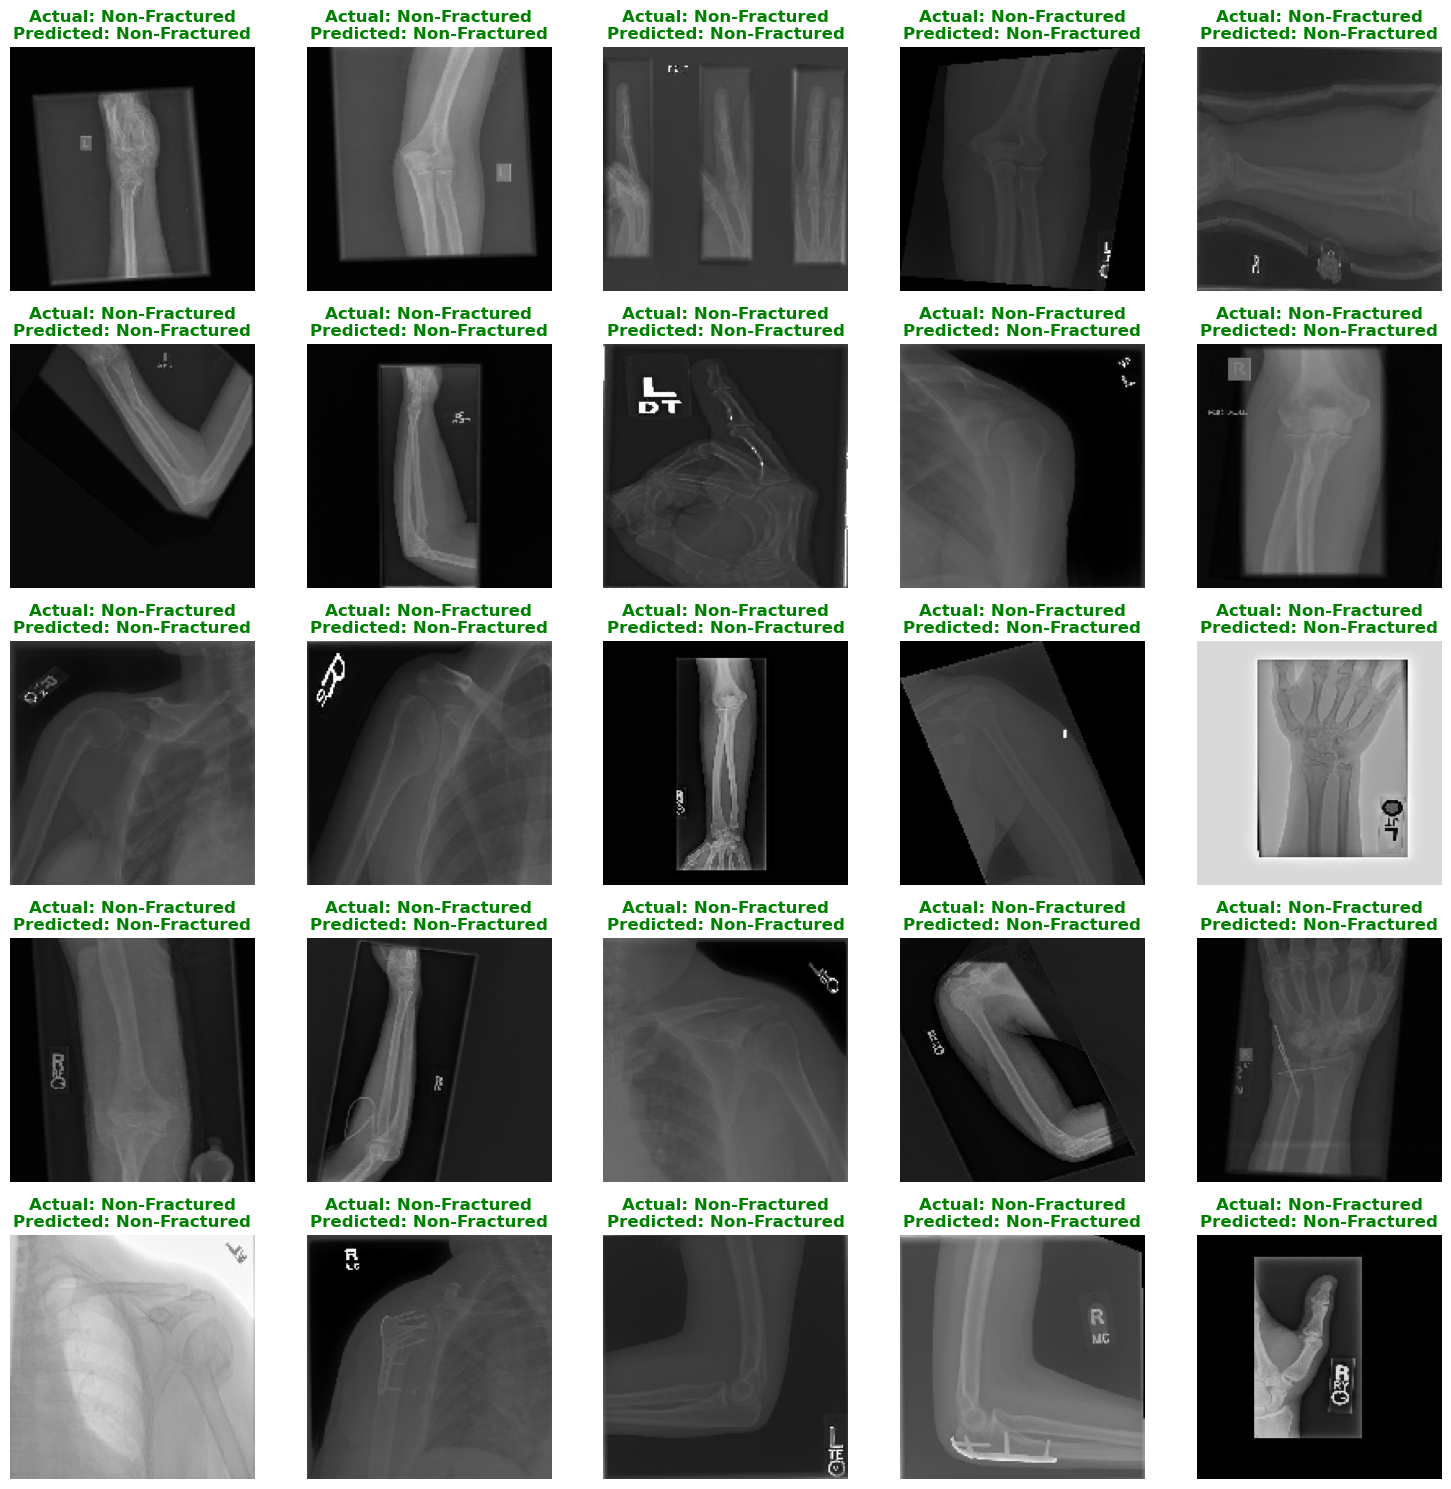

In [49]:
import random

# Define a function to visualize random images with their labels and predicted labels
def show_random_images_with_labels(images, true_labels, predicted_labels, num_images=25):
    indices = random.sample(range(len(images)), num_images)
    selected_images = [images[i] for i in indices]
    selected_true_labels = [true_labels[i] for i in indices]
    selected_predicted_labels = [predicted_labels[i] for i in indices]
    
    num_rows = (num_images + 4) // 5  # Ensure at least 5 images per row
    num_cols = min(num_images, 5)
    
    graph.figure(figsize=(15, 3 * num_rows))
    for i, (image, true_label, predicted_label) in enumerate(zip(selected_images, selected_true_labels, selected_predicted_labels)):
        graph.subplot(num_rows, num_cols, i + 1)
        graph.imshow(image)
        actual_label = "Fractured" if true_label == 1 else "Non-Fractured"
        predicted_label = "Fractured" if predicted_label > 0.5 else "Non-Fractured"
        color = 'brown' if actual_label != predicted_label else 'green'
        graph.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", color=color, weight='bold')
        graph.axis('off')
    graph.tight_layout()
    graph.show()

# Make predictions on the test data
predictions = model.predict(test_generator)

# Get true labels from the test generator
true_labels = test_generator.classes

# Visualize random images with their labels and predicted labels
show_random_images_with_labels(test_images, true_labels, predictions)
